PAVIA
Random Forest
10 2022

In [25]:
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
#sns.axes_style('whitegrid');
#fig = plt.figure(figsize = (12, 6))
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sn
########################################################################################


  ########################################################################################
 

In [26]:
#  Read the Data #


In [27]:
from scipy.io import loadmat

def read_HSI():
  X = loadmat('Pavia.mat')['pavia']
  y = loadmat('Pavia_gt.mat')['pavia_gt']
  print(f"X shape: {X.shape}\ny shape: {y.shape}")
  return X, y

X, y = read_HSI()

X shape: (1096, 715, 102)
y shape: (1096, 715)


X shape: (1096, 715, 102)
y shape: (1096, 715)


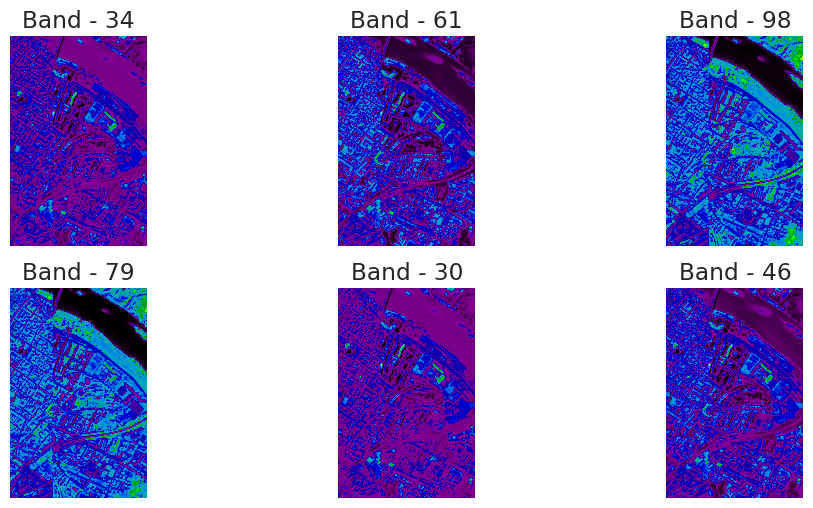

In [28]:
 # Visualize Bands #
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.axes_style('whitegrid')
fig = plt.figure(figsize = (12, 6))
for i in range(1, 1+6):
    fig.add_subplot(2,3, i)
    q = np.random.randint(X.shape[2])
    plt.imshow(X[:,:,q], cmap='nipy_spectral')
    plt.axis('off')
    plt.title(f'Band - {q}')
    plt.savefig('IP_Bands.png')

X, y = read_HSI()

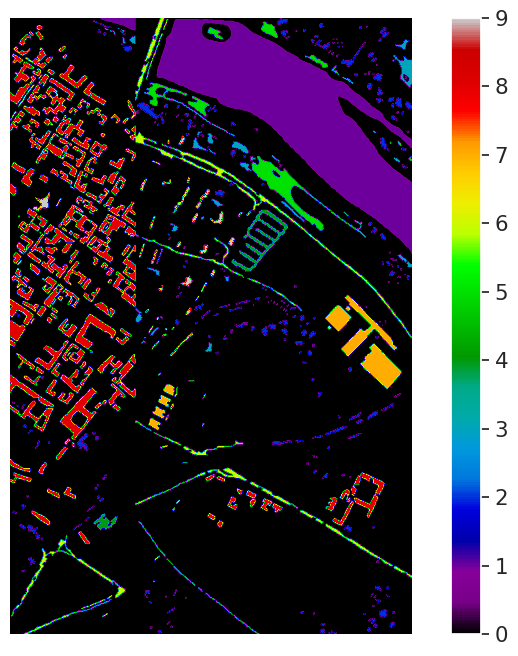

In [29]:
plt.figure(figsize=(10, 8))
plt.imshow(y, cmap='nipy_spectral')
plt.colorbar()
plt.axis('off')
plt.savefig('IP_GT.png')
plt.show()

In [30]:
## Convert the dataset into csv

import pandas as pd
import numpy as np

def extract_pixels(X, y):
  q = X.reshape(-1, X.shape[2])
  df = pd.DataFrame(data = q)
  df = pd.concat([df, pd.DataFrame(data = y.ravel())], axis=1)
  df.columns= [f'band{i}' for i in range(1, 1+X.shape[2])]+['class']
  df.to_csv('Dataset.csv')
  return df
  
df = extract_pixels(X, y)

In [31]:
df.head()

,band1,band2,band3,band4,band5,band6,band7,band8,band9,band10,...,band94,band95,band96,band97,band98,band99,band100,band101,band102,class
0,854,601,350,266,138,118,178,194,257,269,...,3759,3773,3779,3752,3690,3671,3664,3636,3643,0
1,527,642,575,294,123,168,207,154,209,299,...,3873,3902,3921,3861,3854,3882,3834,3725,3768,0
2,374,322,179,87,169,268,360,339,286,309,...,4443,4472,4428,4353,4306,4284,4318,4311,4321,0
3,706,520,560,572,425,243,271,272,258,276,...,3972,4006,4032,3975,3946,3954,3944,3936,3939,0
4,1120,1027,592,414,407,463,417,365,332,334,...,4502,4485,4479,4445,4364,4290,4268,4235,4272,0


In [32]:
df.iloc[:, :-1].describe()

,band1,band2,band3,band4,band5,band6,band7,band8,band9,band10,...,band93,band94,band95,band96,band97,band98,band99,band100,band101,band102
count,783640.000000,783640.000000,783640.000000,783640.000000,783640.000000,783640.000000,783640.000000,783640.000000,783640.000000,783640.000000,...,783640.000000,783640.000000,783640.000000,783640.000000,783640.000000,783640.000000,783640.000000,783640.000000,783640.000000,783640.000000
mean,756.377920,690.307315,643.929436,650.127791,666.007831,671.834180,675.212941,672.903627,674.686433,680.781220,...,1697.386833,1699.732885,1703.646257,1699.515219,1692.456623,1682.842181,1671.153438,1658.587115,1638.005885,1643.461353
std,396.311133,395.274284,403.694296,427.116754,449.411658,462.099314,469.061070,471.706490,478.086505,488.054049,...,1101.857332,1101.298899,1101.531161,1094.214808,1080.862130,1066.634222,1058.692782,1054.097477,1044.365696,1051.107124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,496.000000,428.000000,368.000000,348.000000,345.000000,342.000000,339.000000,332.000000,327.000000,324.000000,...,883.000000,886.000000,890.000000,891.000000,897.000000,902.000000,898.000000,889.000000,874.000000,874.000000
50%,730.000000,647.000000,589.000000,595.000000,613.000000,617.000000,614.000000,606.000000,604.000000,607.000000,...,1683.000000,1686.000000,1689.000000,1686.000000,1680.000000,1672.000000,1661.000000,1648.000000,1627.000000,1634.000000
75%,974.000000,893.000000,846.000000,863.000000,884.000000,888.000000,890.000000,884.000000,885.000000,894.000000,...,2410.000000,2412.000000,2417.000000,2411.000000,2395.000000,2374.000000,2356.000000,2341.000000,2316.000000,2328.000000
max,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,...,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000


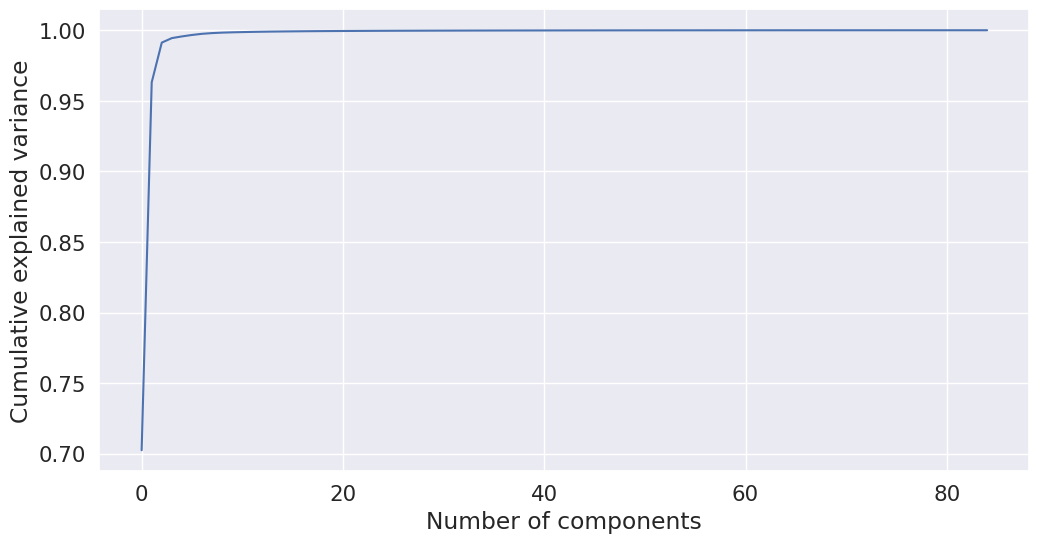

In [33]:
## Principal Component Analysis(PCA)

from sklearn.decomposition import PCA

pca = PCA(n_components = 85)

principalComponents = pca.fit_transform(df.iloc[:, :-1].values)

ev=pca.explained_variance_ratio_

plt.figure(figsize=(12, 6))
plt.plot(np.cumsum(ev))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')


plt.show()

In [34]:
## Select 40 as the no.of components for PCA
pca = PCA(n_components = 40)
dt = pca.fit_transform(df.iloc[:, :-1].values)
q = pd.concat([pd.DataFrame(data = dt), pd.DataFrame(data = y.ravel())], axis = 1)
q.columns = [f'PC-{i}' for i in range(1,41)]+['class']
q.head()

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,PC-9,PC-10,...,PC-32,PC-33,PC-34,PC-35,PC-36,PC-37,PC-38,PC-39,PC-40,class
0,3903.296351,-10579.424391,969.223926,133.981938,-60.165558,-419.585371,-26.111761,230.439418,130.689056,-9.264841,...,-22.864856,-35.466749,27.991567,-54.985019,-42.006769,-20.152821,3.355370,4.399004,-7.191379,0
1,4489.219702,-10495.362304,1200.288715,-120.391541,82.721431,-314.886175,213.728724,-168.935354,235.476250,-110.077821,...,-16.696018,26.917459,3.703972,-11.937699,-22.260906,19.497622,56.059716,1.134225,41.865745,0
2,7537.525472,-11984.664882,1063.019707,-516.632363,-82.281712,181.350808,-84.127048,176.169868,-14.801841,-139.918908,...,15.226385,16.791983,-52.627054,-27.996133,34.965530,-28.827090,26.012991,-9.581421,7.822054,0
3,5856.807574,-10092.589084,1308.820550,-202.800970,67.710994,-354.438385,154.679932,-236.993154,28.490324,139.822896,...,0.678367,-27.443236,5.929750,46.603364,11.343028,47.804876,-35.691950,13.535192,-25.991087,0
4,7812.803615,-11935.049725,1544.780731,307.047887,-579.237495,-340.076493,-2.565575,126.552586,28.922064,10.033326,...,3.101729,-23.131300,15.556853,17.181629,-13.126194,-7.593064,-25.292364,24.133646,93.974855,0


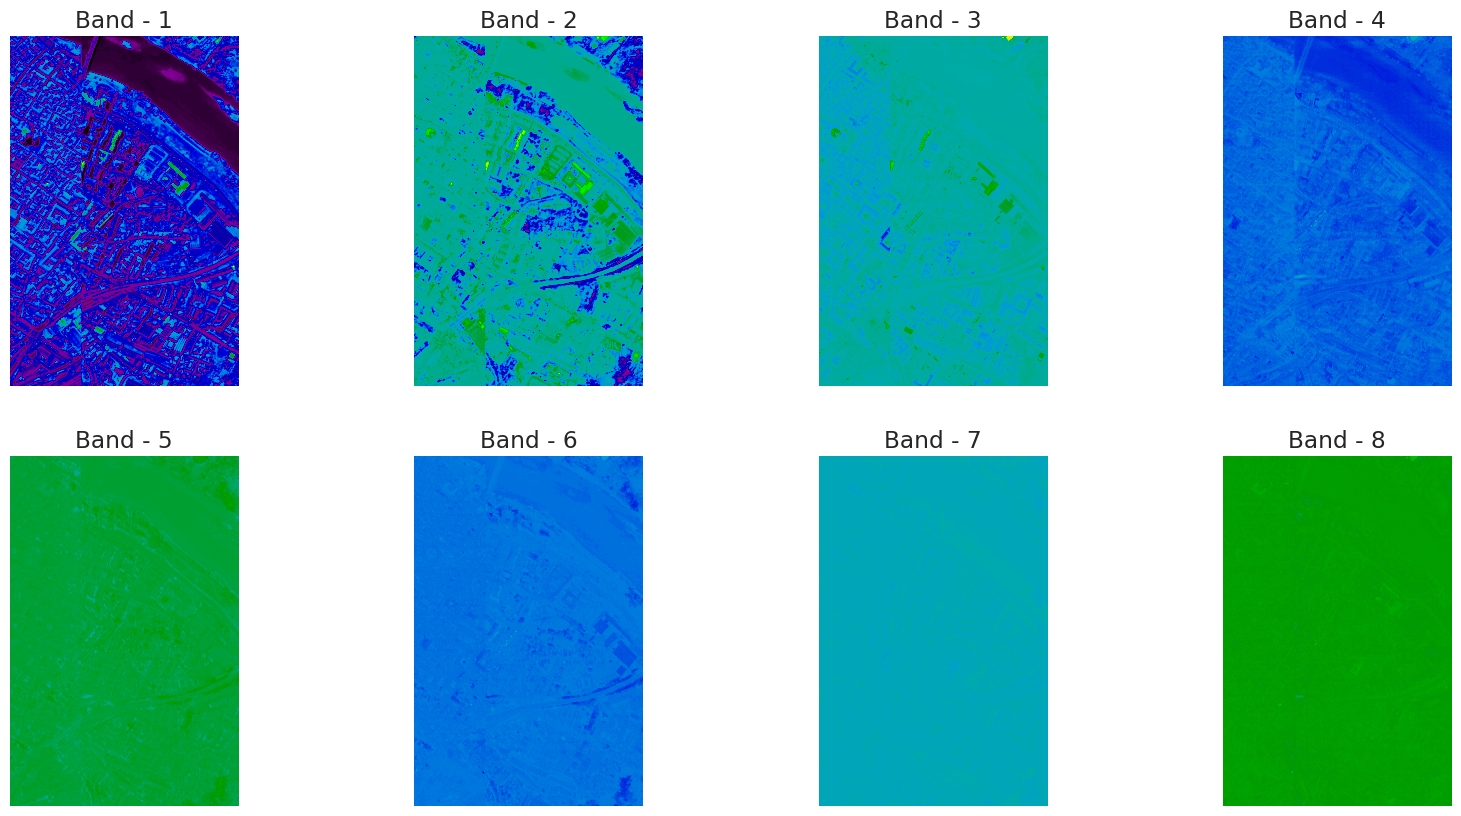

In [35]:
########### Display the bands after PCA #############

fig = plt.figure(figsize = (20, 10))

for i in range(1, 1+8):
    fig.add_subplot(2,4, i)
    plt.imshow(q.loc[:, f'PC-{i}'].values.reshape(1096, 715), cmap='nipy_spectral')
    plt.axis('off')
    plt.title(f'Band - {i}')

plt.savefig('IP_PCA_Bands.png')

Random forest modal

In [36]:
from sklearn.ensemble import RandomForestClassifier

x = q[q['class'] != 0]

X = x.iloc[:, :-1].values

y = x.loc[:, 'class'].values 


names = ['1. Water', '2. Trees', '3. Asphalt', '4. Self-Blocking Bricks', 
                 '5. Bitumen','6. Tiles', '7. Shadows', 
                 '8. Meadows', '9. Bare Soil']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=11, stratify=y)




In [37]:
# RF
#model = RandomForestClassifier(n_estimators=1000)

#model.fit(X_train, y_train)
#ypred = model.predict(X_test)


In [38]:
import matplotlib.pyplot as plt


def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()

In [39]:
#history=model.fit(X_train, y_train)


In [40]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, confusion_matrix

def my_metrics(y_true, y_pred):
    accuracy=accuracy_score(y_true, y_pred)
    precision=precision_score(y_true, y_pred,average='weighted')
    f1Score=f1_score(y_true, y_pred, average='weighted') 
    print("Accuracy  : {}".format(accuracy))
    print("Precision : {}".format(precision))
    print("f1Score : {}".format(f1Score))
    cm=confusion_matrix(y_true, y_pred)
    print(cm)
    return accuracy, precision, f1Score

------------------------------------------------------------------------
Training for fold 1 ...
Accuracy  : 0.985
Precision : 0.9875384615384616
f1Score : 0.9849185823754789
[[86  0  0  0  0  0  0  0  0]
 [ 0 17  0  0  0  0  0  0  0]
 [ 0  0  2  0  0  0  0  0  0]
 [ 0  0  0  3  0  0  0  0  0]
 [ 0  0  0  0  4  0  0  0  0]
 [ 0  0  0  0  0 11  0  0  0]
 [ 0  0  0  0  1  2 13  0  0]
 [ 0  0  0  0  0  0  0 58  0]
 [ 0  0  0  0  0  0  0  0  3]]
[[86  0  0  0  0  0  0  0  0]
 [ 0 17  0  0  0  0  0  0  0]
 [ 0  0  2  0  0  0  0  0  0]
 [ 0  0  0  3  0  0  0  0  0]
 [ 0  0  0  0  4  0  0  0  0]
 [ 0  0  0  0  0 11  0  0  0]
 [ 0  0  0  0  1  2 13  0  0]
 [ 0  0  0  0  0  0  0 58  0]
 [ 0  0  0  0  0  0  0  0  3]]
------------------------------------------------------------------------
Training for fold 2 ...
Accuracy  : 0.99
Precision : 0.9928571428571428
f1Score : 0.9901190476190476
[[94  0  0  0  0  0  0  0  0]
 [ 0  8  0  0  0  0  0  0  0]
 [ 0  0  2  0  0  0  0  0  0]
 [ 0  0  0  6  2  0

/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Predicted Overall        1. Water  2. Trees  3. Asphalt  \
Actual Overall                                            
1. Water                      451         0           0   
2. Trees                        0        53           1   
3. Asphalt                      0         0          14   
4. Self-Blocking Bricks         0         0           0   
5. Bitumen                      0         1           0   
6. Tiles                        0         0           0   
7. Shadows                      0         0           0   
8. Meadows                      0         0           0   
9. Bare Soil                    0         0           0   

Predicted Overall        4. Self-Blocking Bricks  5. Bitumen  6. Tiles  \
Actual Overall                                                           
1. Water                                       0           0         0   
2. Trees                                       0           0         0   
3. Asphalt                                     0      

<Figure size 640x480 with 0 Axes>

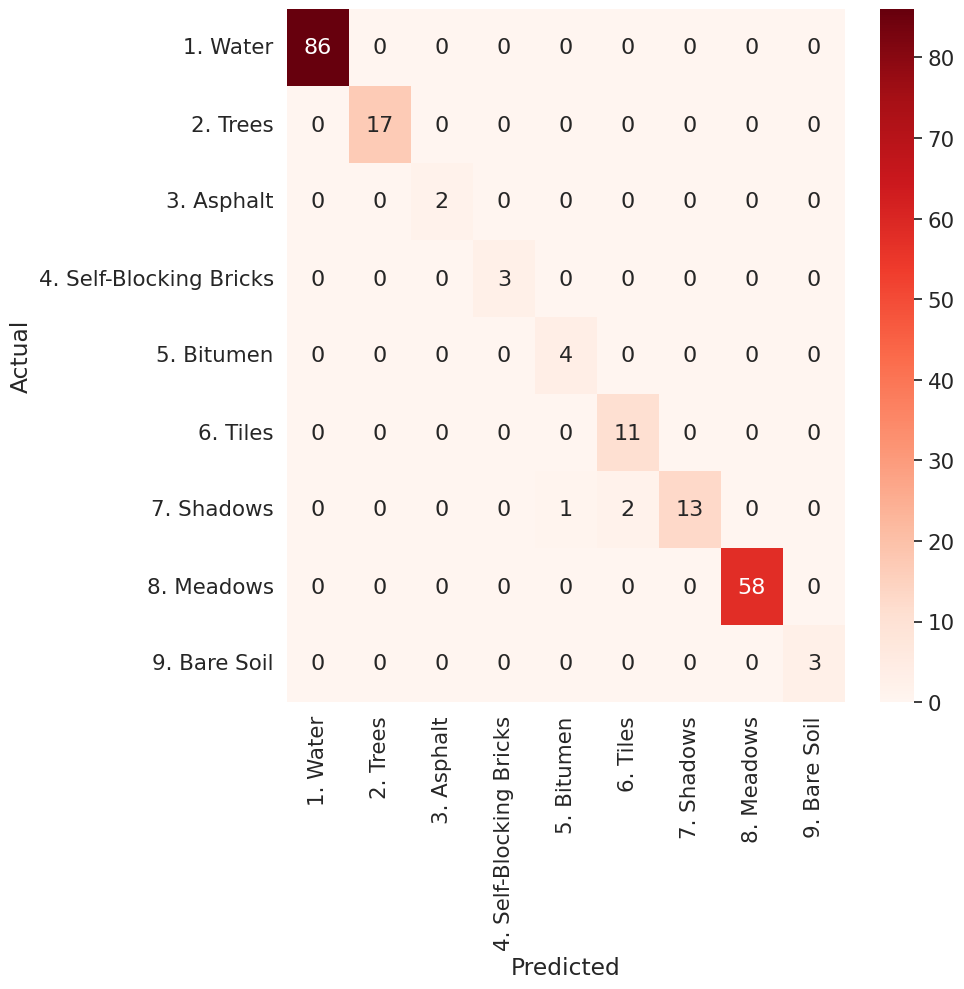

<Figure size 640x480 with 0 Axes>

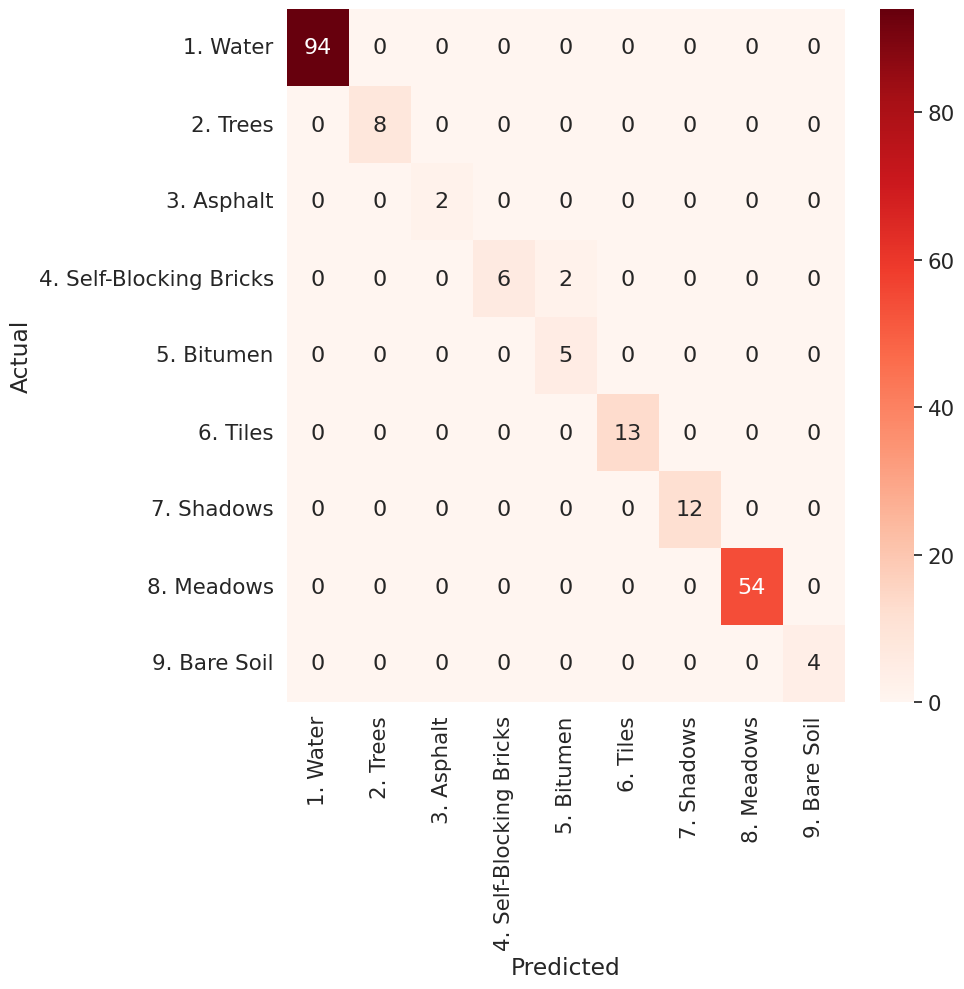

<Figure size 640x480 with 0 Axes>

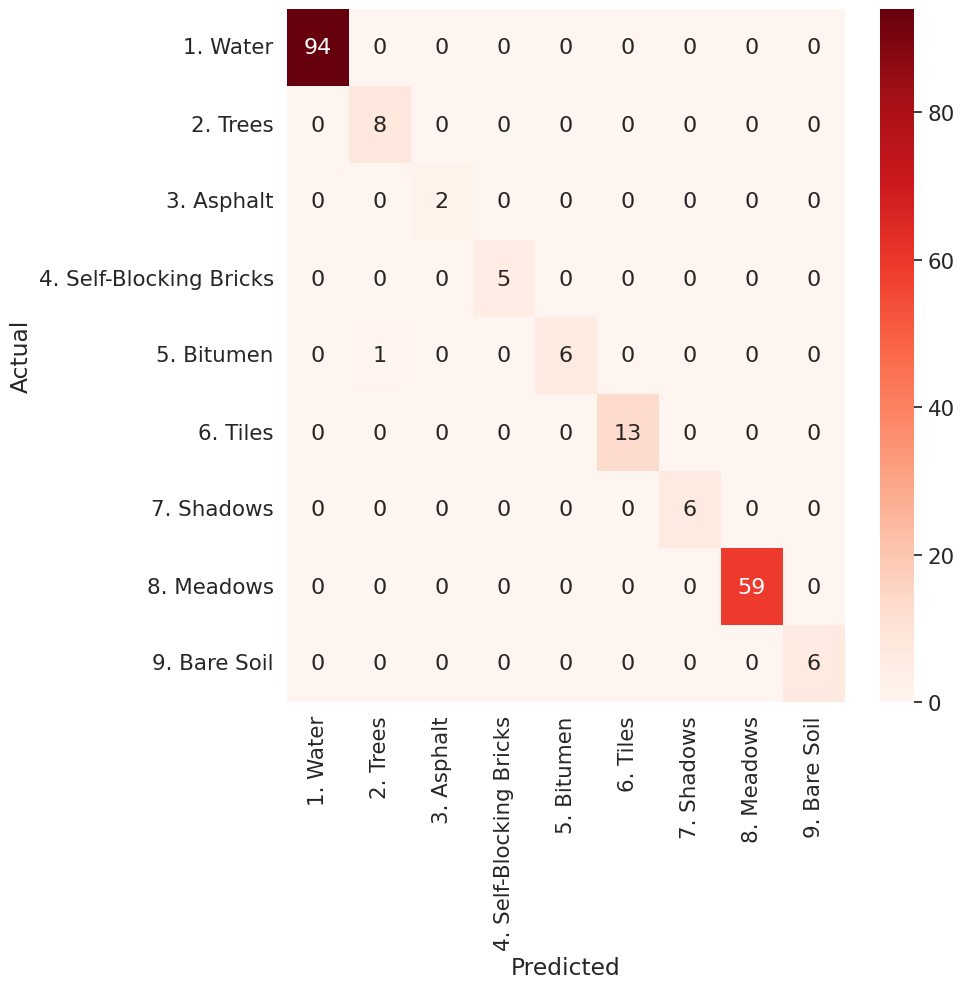

<Figure size 640x480 with 0 Axes>

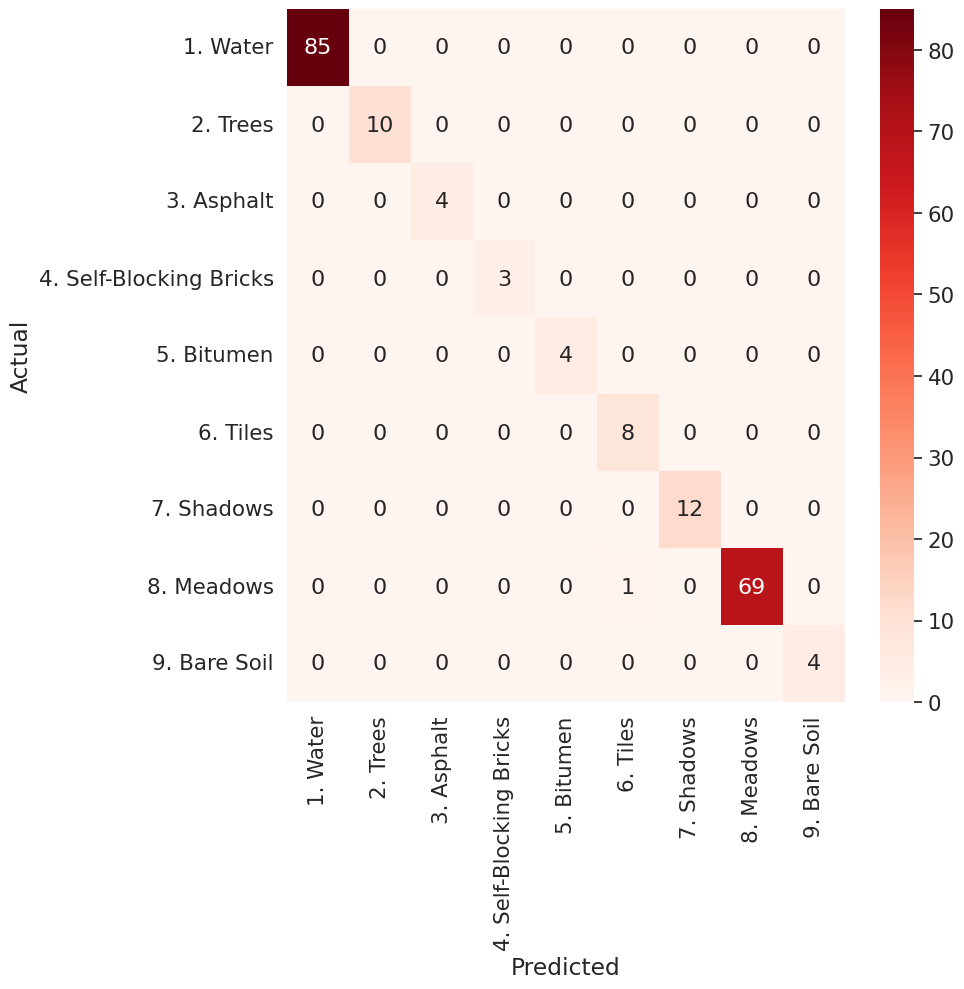

<Figure size 640x480 with 0 Axes>

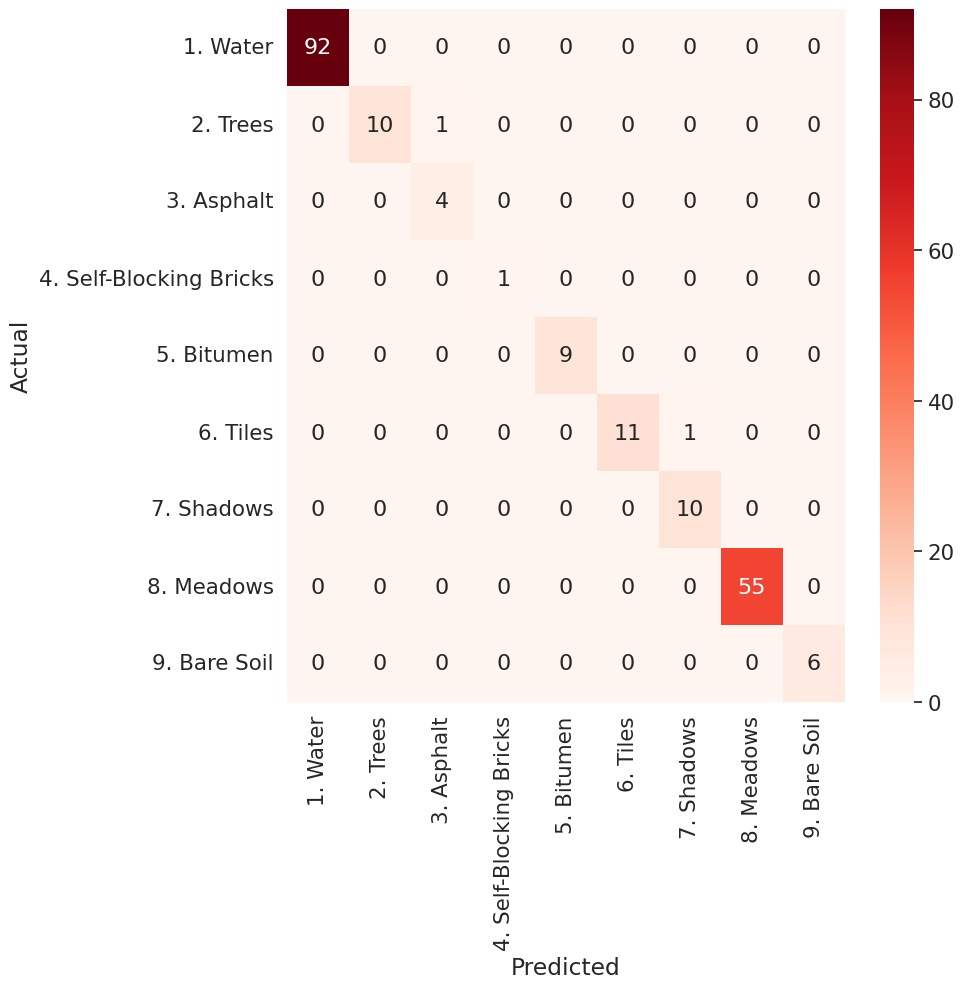

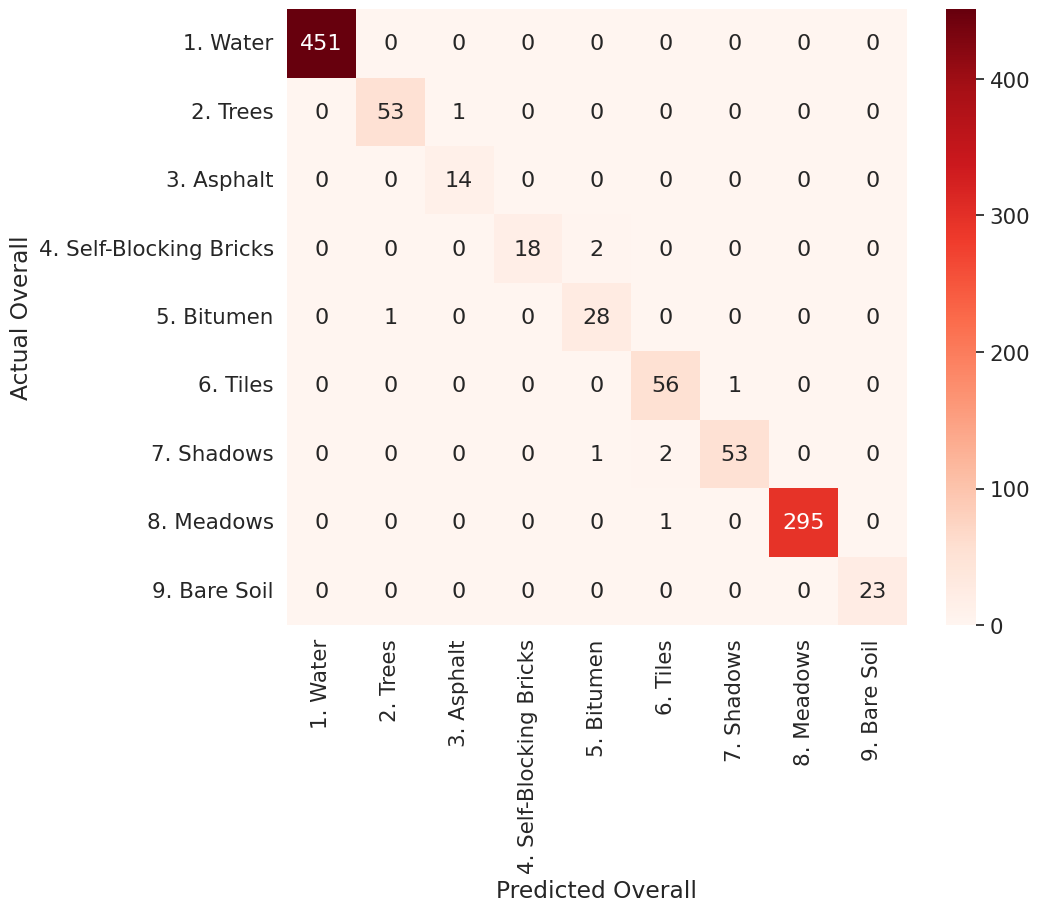

In [41]:

from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold
from tensorflow.keras import layers

import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, cohen_kappa_score
import matplotlib.pyplot as plt
from keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input
from keras.layers import Dense, GlobalAveragePooling2D, Dropout, Flatten
from keras.models import Model

import tensorflow as tf

# configuration
confmat = 0
batch_size = 50
loss_function = sparse_categorical_crossentropy
no_classes = 9
no_epochs = 20
optimizer = Adam()
verbosity = 1
num_folds = 5

Xtrain=X_train
Xtest=X_test
ytrain=y_train
ytest=y_test

NN=len(Xtrain)
NN=500

input_train=Xtrain[0:NN]
target_train=ytrain[0:NN]

input_test=Xtest[0:NN]
target_test=ytest[0:NN]

# Determine shape of the data
#input_shape = (img_width, img_height, img_num_channels)

# Parse numbers as floats
#input_train = input_train.astype('float32')
#input_test = input_test.astype('float32')

# Normalize data
#input_train = input_train / 255
#input_test = input_test / 255

# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []

Y_pred=[]
y_pred=[]
# Merge inputs and targets
inputs = np.concatenate((input_train, input_test), axis=0)
targets = np.concatenate((target_train, target_test), axis=0)

# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs, targets):

  #  model architecture

  # Compile the model
  #model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

   # Compile the model
 # model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

  #model = build_model(num_classes=9)
  model = RandomForestClassifier(n_estimators=1000)


  #model.compile(loss=loss_function, optimizer='rmsprop',metrics=['accuracy'])

  #model.summary()

  #unfreeze_model(model)
  #model.compile(loss=loss_function, optimizer='rmsprop',metrics=['accuracy'])



  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  #model.summary()
  
 # history = model.fit(inputs[train], targets[train],
    #          validation_data = (inputs[test],targets[test]),
    #          epochs=no_epochs,verbose=2 )
  history=model.fit(X_train, y_train)

  #plt.figure()
  #plot_hist(history)
 # hist = model.fit(inputs[train], targets[train],
   #                 steps_per_epoch=(29943/batch_size),
   #                 epochs=5,
   #                 validation_data=(inputs[test],targets[test]),
   #                 validation_steps=(8000/batch_size),
   #                 initial_epoch=20,
   #                 verbose=1 )
  plt.figure()
    


  # Generate generalization metrics
  #scores = model.predict(inputs[test], targets[test])
  #print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  #acc_per_fold.append(scores[1] * 100)
  #loss_per_fold.append(scores[0])



  # confusion_matrix
  y_pred = model.predict(inputs[test])
  #ypred = model.predict(X_test)

  #y_pred = np.argmax(Y_pred, axis=1)
  #target_test=targets[test]

  valAcc, valPrec, valFScore = my_metrics(targets[test], y_pred)


  confusion = confusion_matrix(targets[test], y_pred)
  
  df_cm = pd.DataFrame(confusion, columns=np.unique(names), index = np.unique(names))
  df_cm.index.name = 'Actual'
  df_cm.columns.name = 'Predicted'
  plt.figure(figsize = (9,9))
  sn.set(font_scale=1.4)#for label size
  sn.heatmap(df_cm, cmap="Reds", annot=True,annot_kws={"size": 16}, fmt='d')
  plt.savefig('cmap.png', dpi=300)
  print(confusion_matrix(targets[test], y_pred))

  confmat    = confmat + confusion; 
  

  # Increase fold number
  fold_no = fold_no + 1

# == average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

Overall_Conf = pd.DataFrame(confmat, columns=np.unique(names), index = np.unique(names))
Overall_Conf.index.name = 'Actual Overall'
Overall_Conf.columns.name = 'Predicted Overall'
plt.figure(figsize = (10,8))
sn.set(font_scale=1.4)#for label size
sn.heatmap(Overall_Conf, cmap="Reds", annot=True,annot_kws={"size": 16}, fmt='d')
plt.savefig('cmap.png', dpi=300)
print(Overall_Conf)


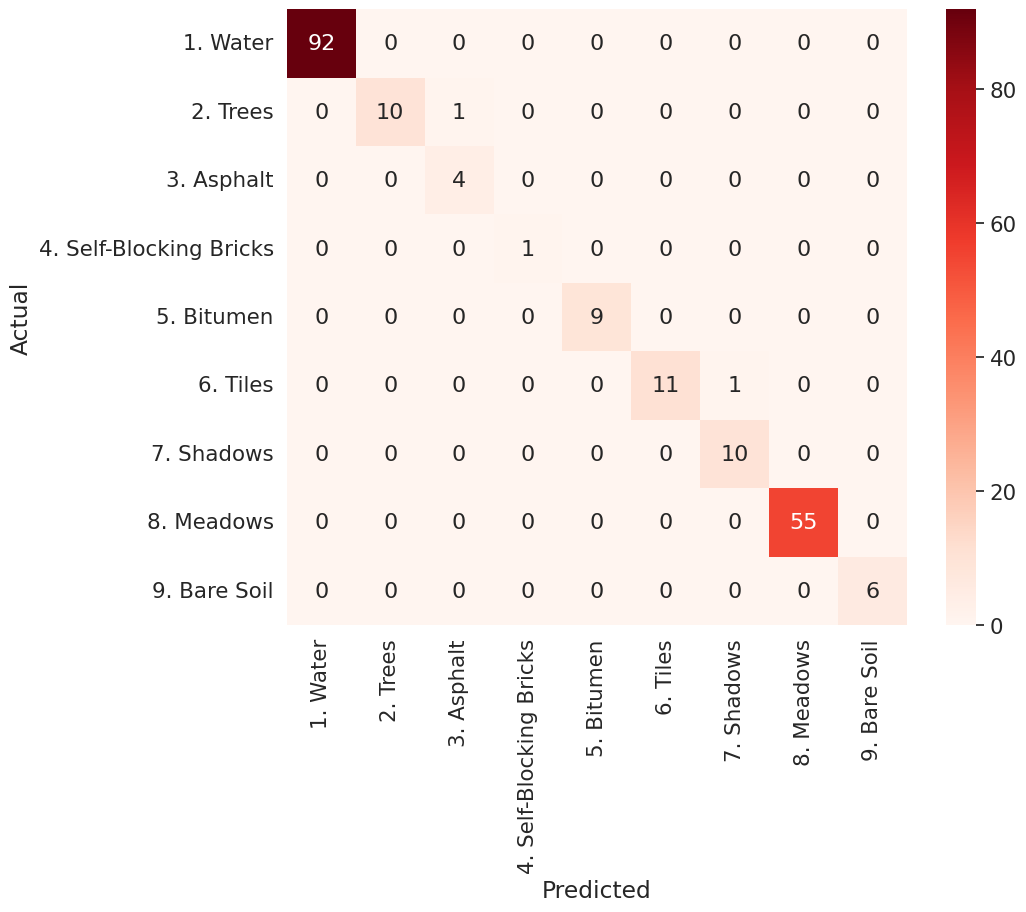

In [50]:
data = confusion_matrix(targets[test], y_pred)
df_cm = pd.DataFrame(data, columns=np.unique(names), index = np.unique(names))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,8))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Reds", annot=True,annot_kws={"size": 16}, fmt='d')
plt.savefig('cmap.png', dpi=300)

In [51]:
print(classification_report(targets[test], y_pred, target_names = names))

                         precision    recall  f1-score   support

               1. Water       1.00      1.00      1.00        92
               2. Trees       1.00      0.91      0.95        11
             3. Asphalt       0.80      1.00      0.89         4
4. Self-Blocking Bricks       1.00      1.00      1.00         1
             5. Bitumen       1.00      1.00      1.00         9
               6. Tiles       1.00      0.92      0.96        12
             7. Shadows       0.91      1.00      0.95        10
             8. Meadows       1.00      1.00      1.00        55
           9. Bare Soil       1.00      1.00      1.00         6

               accuracy                           0.99       200
              macro avg       0.97      0.98      0.97       200
           weighted avg       0.99      0.99      0.99       200



In [ ]:
##############  Classification Map  ####################
l=[]
for i in range(q.shape[0]):
  if q.iloc[i, -1] == 0:
    l.append(0)
  else:
    l.append(model.predict(q.iloc[i, :-1].values.reshape(1, -1)))


In [ ]:
clmap = np.array(l).reshape(610, 340).astype('float')
plt.figure(figsize=(10, 8))
plt.imshow(clmap, cmap='nipy_spectral')
plt.colorbar()
plt.axis('off')
plt.savefig('IP_cmap.png')
plt.show()